In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(os.path.expanduser(
    '/models/ecoli/analysis/local_notebooks/C_limited_PDR_analyses_with_published_paper_data/supplementary_data/'))
import plotly.graph_objects as go
import glob
import plotly.express as px

# C-lim half life experimental data

The following data is from Gupta et al. 2024: https://www.nature.com/articles/s41467-024-49920-8#Sec20

Specifically, this data comes from Supplementary Table 1: "TableS1 - Half-lives for 3262 proteins across 13 growth conditions >>", which contains the half-lives of proteins in E. coli under carbon-limited conditions. This is the data we are interested in comparing to our model predictions.

- this data has some "ceiling" values it auto assigns proteins to. We will ignore these values for now and only consider the proteins with measured half-lives.


In [26]:
# load in the C-lim half life data from Gupta et al. 2024: 
Clim_data = pd.read_excel('Gupta_et_al_2024_ST1_C_lim_data.xlsx')

# remove the ceiling values from the data that are marked with an asterisk: 
Clim_data.replace(r'\*', np.nan, regex=True, inplace=True)

# recalculate the "mean" value in C_lim3_mean, C_lim6_mean, and C_lim12_mean now that there are NaN values replacing the ceiling values: 
Clim_data['C_lim3_mean'] = Clim_data[['C_lim3_1', 'C_lim3_2']].mean(axis=1, skipna=True)
Clim_data['C_lim6_mean'] = Clim_data[['C_lim6_1', 'C_lim6_2']].mean(axis=1, skipna=True)
Clim_data['C_lim12_mean'] = Clim_data[['C_lim12_1', 'C_lim12_2']].mean(axis=1, skipna=True)

# drop any rows that have a "NaN" value in the "Gene names" or "Protein ID" column:
# todo: ask Nora if she thinks I should do this? and if we should manually just extract the gene name from somewhere else? It only gets rid of two proteins/rows
Clim_data.dropna(subset=['Gene names ', 'Protein ID'], inplace=True)

# drop any rows that have NaN values for each of the following columns: C_lim3_1, C_lim3_2, C_lim6_1, C_lim6_2, C_lim12_1, C_lim12_2
Clim_data.dropna(subset=['C_lim3_1', 'C_lim3_2', 'C_lim6_1', 'C_lim6_2', 'C_lim12_1', 'C_lim12_2'], how="all", inplace=True)

In [20]:
Clim_data

,Protein ID,Gene names,C_lim3_1,C_lim3_2,C_lim3_mean,C_lim6_1,C_lim6_2,C_lim6_mean,C_lim12_1,C_lim12_2,C_lim12_mean
0,sp|A5A614|YCIZ_ECOLI,yciZ,NaN,NaN,NaN,3.932642,3.601144,3.766893,NaN,NaN,NaN
1,sp|O32583|THIS_ECOLI,thiS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.469682,4.469682
2,sp|P00350|6PGD_ECOLI,gnd,3.248315,3.163151,3.205733,5.572427,6.131487,5.851957,10.201045,9.866244,10.033644
3,sp|P00363|FRDA_ECOLI,frdA,2.992966,2.946457,2.969711,6.080384,6.670409,6.375396,13.518765,10.761427,12.140096
4,sp|P00370|DHE4_ECOLI,gdhA,3.076857,2.810401,2.943629,4.462108,4.855534,4.658821,7.653326,6.918810,7.286068
...,...,...,...,...,...,...,...,...,...,...,...
2946,sp|P76458|ATOD_ECOLI,atoD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.543730,8.543730
2947,sp|P77162|YKFB_ECOLI,ykfB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.330147,5.330147
2948,sp|Q46892|YGBN_ECOLI,ygbN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.226770,15.226770
2950,sp|Q47274|REQ1_ECOLI,quuD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.733813,8.733813


## Plot of all proteins that have a half life under 2 hours in the C-limited 12 hr chemostat 

In [25]:
# filter out proteins that have a mean half life greater than 2 hours in the C-lim 12 hr measurement: 
Clim12_under_2hrs = Clim_data[Clim_data['C_lim12_mean'] <= 2] # 91 rows

# filter out proteins that have NaN values for each replicate for one doubling time measurment (because it will not show up nicely on the graph): 
Clim12_under_2hrs.dropna(subset=['C_lim3_mean', 'C_lim6_mean', 'C_lim12_mean']) # 70 rows 

,Protein ID,Gene names,C_lim3_1,C_lim3_2,C_lim3_mean,C_lim6_1,C_lim6_2,C_lim6_mean,C_lim12_1,C_lim12_2,C_lim12_mean
34,sp|P00936|CYAA_ECOLI,cyaA,0.834197,8.554738e-01,8.448355e-01,NaN,1.194742,1.194742,1.500753,1.814483e+00,1.657618
79,sp|P04949|FLIC_ECOLI,fliC,0.572848,8.613680e-01,7.171081e-01,0.985057,0.462050,0.723554,1.371948,5.405897e-01,0.956269
133,sp|P06993|MALT_ECOLI,malT,0.536392,6.838049e-01,6.100983e-01,1.114213,0.980639,1.047426,1.502937,1.250091e+00,1.376514
278,sp|P0A6R3|FIS_ECOLI,fis,NaN,6.823146e-01,6.823146e-01,0.990229,NaN,0.990229,NaN,7.307034e-01,0.730703
309,sp|P0A725|LPXC_ECOLI,lpxC,0.392410,5.408450e-01,4.666273e-01,0.939977,0.782796,0.861386,1.335069,8.660660e-01,1.100568
...,...,...,...,...,...,...,...,...,...,...,...
2717,sp|Q47129|FEAR_ECOLI,feaR,0.300514,4.275726e-01,3.640433e-01,0.723959,0.598690,0.661325,NaN,6.496005e-01,0.649601
2727,sp|P0AAS9|YBDD_ECOLI,ybdD,NaN,1.434577e+00,1.434577e+00,1.169254,1.811866,1.490560,1.466733,NaN,1.466733
2733,sp|P0ACW6|YDCH_ECOLI,ydcH,NaN,1.332188e+00,1.332188e+00,1.939351,1.796777,1.868064,NaN,1.745587e+00,1.745587
2742,sp|P0AFW2|RMF_ECOLI,rmf,NaN,2.415470e-09,2.415470e-09,0.071175,NaN,0.071175,0.102756,7.805440e-09,0.051378


In [38]:
# Generate the 3D plot using plotly:
fig = go.Figure(data=[go.Scatter3d(
    x=Clim12_under_2hrs['C_lim3_mean'],  # X axis
    y=Clim12_under_2hrs['C_lim6_mean'],  # Y axis
    z=Clim12_under_2hrs['C_lim12_mean'], # Z axis
    mode='markers',       # Use markers for scatter plot
    marker=dict(
        size=5,
        colorscale='Viridis',
        opacity=0.8
    ), 
    text=Clim12_under_2hrs['Gene names '],  # Add 'Gene names' as hover text
    hovertemplate="<b>Gene name:</b> %{text}<br>" +  # Display Gene names
                  "<b>C_lim3_mean:</b> %{x}<br>" +   # Display C_lim3_mean
                  "<b>C_lim6_mean:</b> %{y}<br>" +   # Display C_lim6_mean
                  "<b>C_lim12_mean:</b> %{z}<br>"    # Display C_lim12_mean

)])

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='C_lim3_mean',
        yaxis_title='C_lim6_mean',
        zaxis_title='C_lim12_mean'
    ),
    title='Comparison of the mean half life values for proteins with half<br> lives under 2 hours in the C-limited 12 hour measurement',
    height=700
)

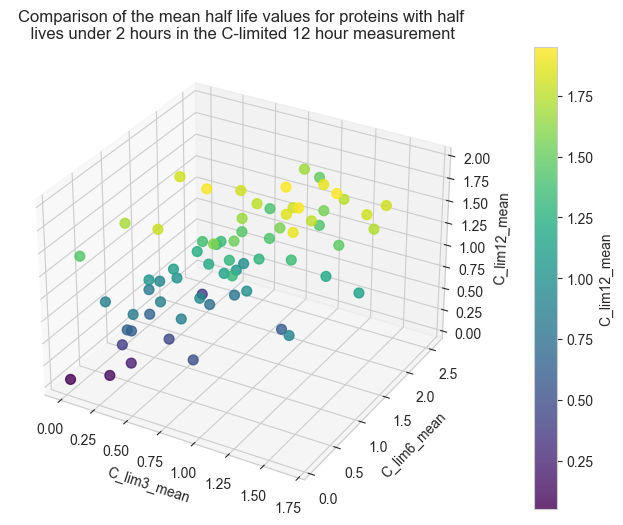

In [37]:
# scatter plot

# Create a 3D plot using Matplotlib
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(
    Clim12_under_2hrs['C_lim3_mean'],  # X axis
    Clim12_under_2hrs['C_lim6_mean'],  # Y axis
    Clim12_under_2hrs['C_lim12_mean'], # Z axis
    c=Clim12_under_2hrs['C_lim12_mean'],
    cmap='viridis',       # Color map
    s=50,                # Size of markers
    alpha=0.8            # Opacity of markers
)

# Add color bar for reference
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('C_lim12_mean')

# Label axes
ax.set_xlabel('C_lim3_mean')
ax.set_ylabel('C_lim6_mean')
ax.set_zlabel('C_lim12_mean')

# Set plot title
plt.title('Comparison of the mean half life values for proteins with half\n lives under 2 hours in the C-limited 12 hour measurement')

# Show the plot
plt.show()